In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns

In [3]:
df = pd.read_csv("Data/data (2).csv", low_memory=False)

In [4]:
df.head()

State       Lat       Lng      Area  Children  Age    Income   Marital  \
0    AL  34.34960 -86.72508  Suburban       1.0   53  86575.93  Divorced   
1    FL  30.84513 -85.22907     Urban       3.0   51  46805.99   Married   
2    SD  43.54321 -96.63772  Suburban       3.0   53  14370.14   Widowed   
3    MN  43.89744 -93.51479  Suburban       0.0   78  39741.49   Married   
4    VA  37.59894 -76.88958     Rural       1.0   22   1209.56   Widowed   

   Gender  ReAdmis  ...  Hyperlipidemia  BackPain  Anxiety  Allergic_rhinitis  \
0    Male        0  ...             0.0       1.0      1.0                1.0   
1  Female        0  ...             0.0       0.0      0.0                0.0   
2  Female        0  ...             0.0       0.0      0.0                0.0   
3    Male        0  ...             0.0       0.0      0.0                0.0   
4  Female        0  ...             1.0       0.0      0.0                1.0   

   Reflux_esophagitis Asthma     Services  Initial_days  TotalCharge  \
0                   0      1   Blood Work     10.585770  3726.702860   
1                   1      0  Intravenous     15.129562  4193.190458   
2                   0      0   Blood Work      4.772177  2434.234222   
3                   1      1   Blood Work      1.714879  2127.830423   
4                   0      0      CT Scan      1.254807  2113.073274   

   Additional_charges  
0        17939.403420  
1        17612.998120  
2        17505.192460  
3        12993.437350  
4         3716.525786  

[5 rows x 32 columns]

## The features to analyze: 

VitD_levels

Doc_visits

TotalCharge

### VitD_levels
Plot a histogram with a kde (kernel density estimate)

Add a line for the mean (red)

Add a line for the median (green)

Add a line for for +1 std from the mean (black)

Add a line for the - 1 std from the mean (black)

Highlight the range between +1 and =1 std (yellow)

#### Graphing

In [23]:
mean = df['VitD_levels'].mean()
median = df['VitD_levels'].median()
std = df['VitD_levels'].std()
plus_one_std = mean + std
minus_one_std = mean - std

In [8]:
df['VitD_levels'].describe()

count    1000.000000
mean       17.992381
std         2.056366
min        11.475314
25%        16.620469
50%        18.020163
75%        19.418254
max        24.565463
Name: VitD_levels, dtype: float64

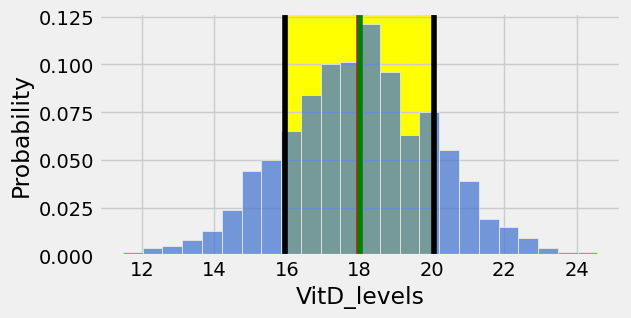

In [28]:
fig,ax = plt.subplots(figsize=(6,3))
sns.histplot(df['VitD_levels'], 
             ax = ax, 
             stat='probability')
# Add a line for the mean (red)
ax.axvline(mean, color = 'red');
# Add a line for the median (green)
ax.axvline(median,color = 'green');
# Add a line for for +1 std from the mean (black)
ax.axvline(plus_one_std, color = 'black');
# Add a line for the - 1 std from the mean (black)
ax.axvline(minus_one_std, color = 'black');
# Highlight the range between +1 and =1 std (yellow)
ax.axvspan(plus_one_std, minus_one_std, color = 'yellow', zorder = 0)

In [37]:
print(mean)
print(median)

17.992380894860002
18.020163095


#### Answer the following questions:

Is it Discrete or Continuous?

Does it have a skew? If so, which direction (+/-)

What type of kurtosis does it display? (Mesokurtic, Leptokurtic, Platykurtic)

##### Is it discrete or continuous?

Vitamin D levels is continuous.  There is no specific unit/level of vitamin D that is cut off.

##### Does it have a skew? If so, which direction (+/-)

The mean is slightly less than the median, so there is a very slight negative skew.

#####  What type of kurtosis does it display? (Mesokurtic, Leptokurtic, Platykurtic)

In [30]:
from scipy import stats
kurt = stats.kurtosis(df['VitD_levels'], fisher = False)
print(kurt)

3.013147515833447


It displays **Mesokurtic** kurtosis, we can tell because the kurtosis value is very nearly 3.  It is very slightly Lepokurtic

### Doc_visits

Plot a histogram with a kde (kernel density estimate)

Add a line for the mean (red)

Add a line for the median (green)

Add a line for for +1 std from the mean (black)

Add a line for the - 1 std from the mean (black)

Highlight the range between +1 and =1 std (yellow)

#### Graphing

In [32]:
mean_doc = df['Doc_visits'].mean()
median_doc = df['Doc_visits'].median()
std_doc = df['Doc_visits'].std()
plus_one_std_doc = mean_doc + std_doc
minus_one_std_doc = mean_doc - std_doc
df['Doc_visits'].describe()

count    1000.000000
mean        4.992000
std         1.048349
min         2.000000
25%         4.000000
50%         5.000000
75%         6.000000
max         9.000000
Name: Doc_visits, dtype: float64

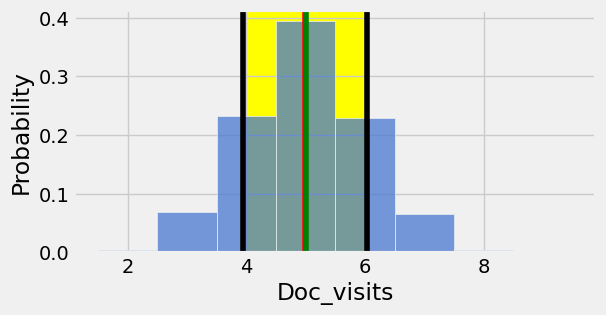

In [35]:
fig,ax = plt.subplots(figsize=(6,3))
sns.histplot(df['Doc_visits'], 
             ax = ax, 
             stat='probability',
             discrete = True)
# Add a line for the mean (red)
ax.axvline(mean_doc, color = 'red');
# Add a line for the median (green)
ax.axvline(median_doc,color = 'green');
# Add a line for for +1 std from the mean (black)
ax.axvline(plus_one_std_doc, color = 'black');
# Add a line for the - 1 std from the mean (black)
ax.axvline(minus_one_std_doc, color = 'black');
# Highlight the range between +1 and =1 std (yellow)
ax.axvspan(plus_one_std_doc, minus_one_std_doc, color = 'yellow', zorder = 0)

In [36]:
print(mean_doc)
print(median_doc)

4.992
5.0


#### Answer the following questions:

Is it Discrete or Continuous?

Does it have a skew? If so, which direction (+/-)

What type of kurtosis does it display? (Mesokurtic, Leptokurtic, Platykurtic)

##### Is it Discrete or Continuous?

This is discrete, there are distinct units of value possible for dr visits.  For example, nobody can attend 3/4 of a dr visit.

##### Does it have a skew? If so, which direction (+/-)

The mean is slightly less than the median, so there is a very slight negative skew

#####  What type of kurtosis does it display? (Mesokurtic, Leptokurtic, Platykurtic)

In [38]:
from scipy import stats
kurt = stats.kurtosis(df['Doc_visits'], fisher = False)
print(kurt)

2.9919958083381206


It displays **Mesokurtic** kurtosis, with very slight Platykurtic kurtosis, we can tell because the kurtosis value is less than 3, but extremely close to 3.

### TotalCharge
Plot a histogram with a kde (kernel density estimate)

Add a line for the mean (red)

Add a line for the median (green)

Add a line for for +1 std from the mean (black)

Add a line for the - 1 std from the mean (black)

Highlight the range between +1 and =1 std (yellow)

#### Graphing

In [43]:
mean_charge = df['TotalCharge'].mean()
median_charge = df['TotalCharge'].median()
std_charge = df['TotalCharge'].std()
plus_one_std_charge = mean_charge + std_charge
minus_one_std_charge = mean_charge - std_charge
df['TotalCharge'].describe()

count    1000.000000
mean     3240.971613
std       600.413722
min      2022.650007
25%      2822.108670
50%      3164.679245
75%      3628.550654
max      5572.846022
Name: TotalCharge, dtype: float64

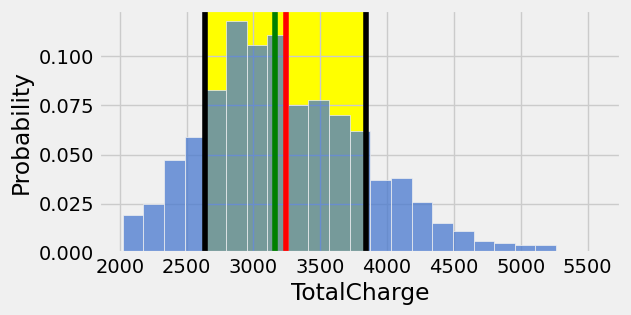

In [44]:
fig,ax = plt.subplots(figsize=(6,3))
sns.histplot(df['TotalCharge'], 
             ax = ax, 
             stat='probability')
# Add a line for the mean (red)
ax.axvline(mean_charge, color = 'red');
# Add a line for the median (green)
ax.axvline(median_charge,color = 'green');
# Add a line for for +1 std from the mean (black)
ax.axvline(plus_one_std_charge, color = 'black');
# Add a line for the - 1 std from the mean (black)
ax.axvline(minus_one_std_charge, color = 'black');
# Highlight the range between +1 and =1 std (yellow)
ax.axvspan(plus_one_std_charge, minus_one_std_charge, color = 'yellow', zorder = 0)

In [45]:
print(mean_charge)
print(median_charge)

3240.9716133389998
3164.6792455


#### Answer the following questions:

Is it Discrete or Continuous?

Does it have a skew? If so, which direction (+/-)

What type of kurtosis does it display? (Mesokurtic, Leptokurtic, Platykurtic)

##### Is it Discrete or Continuous?

Charge is continuous. There is no specific unit/level of charge that is cut off.

##### Does it have a skew? If so, which direction (+/-)

The mean is slightly more than the median, so there is a very slight positive skew

#####  What type of kurtosis does it display? (Mesokurtic, Leptokurtic, Platykurtic)

In [47]:
from scipy import stats
kurt = stats.kurtosis(df['TotalCharge'], fisher = False)
print(kurt)

3.2650077463439384


It is Lepokurtic, definitely above 3.  Not massively so, but .265 is enough of a difference that it is not mesokurtic.